# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d brahma0545/aaic-assignment-tl

100% 4.34G/4.34G [03:24<00:00, 22.0MB/s]
100% 4.34G/4.34G [03:24<00:00, 22.7MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/aaic-assignment-tl.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# !gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu 



In [ ]:
#unrar the file
# get_ipython().system_raw("unrar x rvl-cdip.rar")

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [ ]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import datetime
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten ,Dropout
from keras.applications.vgg16 import VGG16
from keras.callbacks import TensorBoard




In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
df=pd.read_csv('labels_final.csv',dtype=str)

In [ ]:
df.head

<bound method NDFrame.head of                                              path label
0      imagesv/v/o/h/voh71d00/509132755+-2755.tif     3
1            imagesl/l/x/t/lxt19d00/502213303.tif     3
2           imagesx/x/e/d/xed05a00/2075325674.tif     2
3      imageso/o/j/b/ojb60d00/517511301+-1301.tif     3
4           imagesq/q/z/k/qzk17e00/2031320195.tif     7
...                                           ...   ...
47995      imagesk/k/q/l/kql82f00/tob07414.87.tif    10
47996  imagesi/i/r/r/irr80c00/2084343690_3692.tif    12
47997  imagesa/a/z/h/azh32d00/2063887153_7176.tif     6
47998       imagesg/g/p/d/gpd45f00/0060075263.tif     8
47999       imagesr/r/o/l/rol45d00/2064701657.tif     1

[48000 rows x 2 columns]>

Imagedatagenerator generates batches of tensor image data with real-time data augmentation.

In [ ]:
#https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
# https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1
from keras_preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1/255,validation_split=0.25)

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="/content/data_final", x_col="path", y_col="label", class_mode="categorical",subset='training',
                                            target_size=(224,224), batch_size=16)
#https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

Found 36000 validated image filenames belonging to 16 classes.


In [ ]:
test_generator= datagen.flow_from_dataframe(dataframe=df, directory="/content/data_final", x_col="path", y_col="label", class_mode="categorical",subset='validation',
                                            target_size=(224,224), batch_size=16)

##subset==training or validation works if validation_split is set in Imagedatagenerator
##actual vgg16 takes 224*224 as input

Found 12000 validated image filenames belonging to 16 classes.


In [ ]:
Model = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)
##include_top==false i.e. dont consider top 3 dense layers

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
Model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
Model.layers

7. Do print model.summary() and draw model_plots for each of the model.

In [ ]:
%load_ext tensorboard
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks= TensorBoard(log_dir=log_folder, histogram_freq=1)

##https://neptune.ai/blog/tensorboard-tutorial

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer.
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model.
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network.

</pre>

In [ ]:
##https://www.kaggle.com/code/sukanthen/cnn-architectures-custom-and-transfer-learning
##https://keras.io/api/layers/merging_layers/add/#:~:text=input1%20%3D%20tf,%3Dout)
##https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/
##https://keras.io/api/models/model/
for layer in Model.layers:
  layer.trainable = False
first_output=Model.output
first_output= Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu")(first_output)
first_output= MaxPool2D(2,2)(first_output)
first_output= Flatten()(first_output)
first_output= Dense(256, activation="relu")(first_output)
# first_output= Dropout(0.25) (first_output)
first_output= Dense(128, activation="relu")(first_output)
first_output= Dropout(0.2)(first_output)
final_output= Dense(16, activation="softmax")(first_output)
Model_1 = tf.keras.Model(inputs = Model.input, outputs =final_output)

In [ ]:
Model_1.compile(loss="categorical_crossentropy", optimizer ='Adam', metrics=["accuracy"])

In [ ]:
Model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
Model_1.fit_generator(train_generator,epochs=6,validation_data=test_generator,callbacks=[callbacks])

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


1125/1125 [==============================] - 267s 237ms/step - loss: 1.4530 - accuracy: 0.5531 - val_loss: 1.0823 - val_accuracy: 0.6687
Epoch 2/6
1125/1125 [==============================] - 265s 235ms/step - loss: 1.0230 - accuracy: 0.6888 - val_loss: 1.0003 - val_accuracy: 0.6928
Epoch 3/6
1125/1125 [==============================] - 263s 234ms/step - loss: 0.8609 - accuracy: 0.7377 - val_loss: 0.9412 - val_accuracy: 0.7148
Epoch 4/6
1125/1125 [==============================] - 330s 293ms/step - loss: 0.7518 - accuracy: 0.7690 - val_loss: 0.9008 - val_accuracy: 0.7362
Epoch 5/6
1125/1125 [==============================] - 329s 293ms/step - loss: 0.6695 - accuracy: 0.7936 - val_loss: 0.8871 - val_accuracy: 0.7466
Epoch 6/6
1125/1125 [==============================] - 333s 296ms/step - loss: 0.5982 - accuracy: 0.8146 - val_loss: 0.9063 - val_accuracy: 0.7412


In [ ]:

%tensorboard --logdir logs

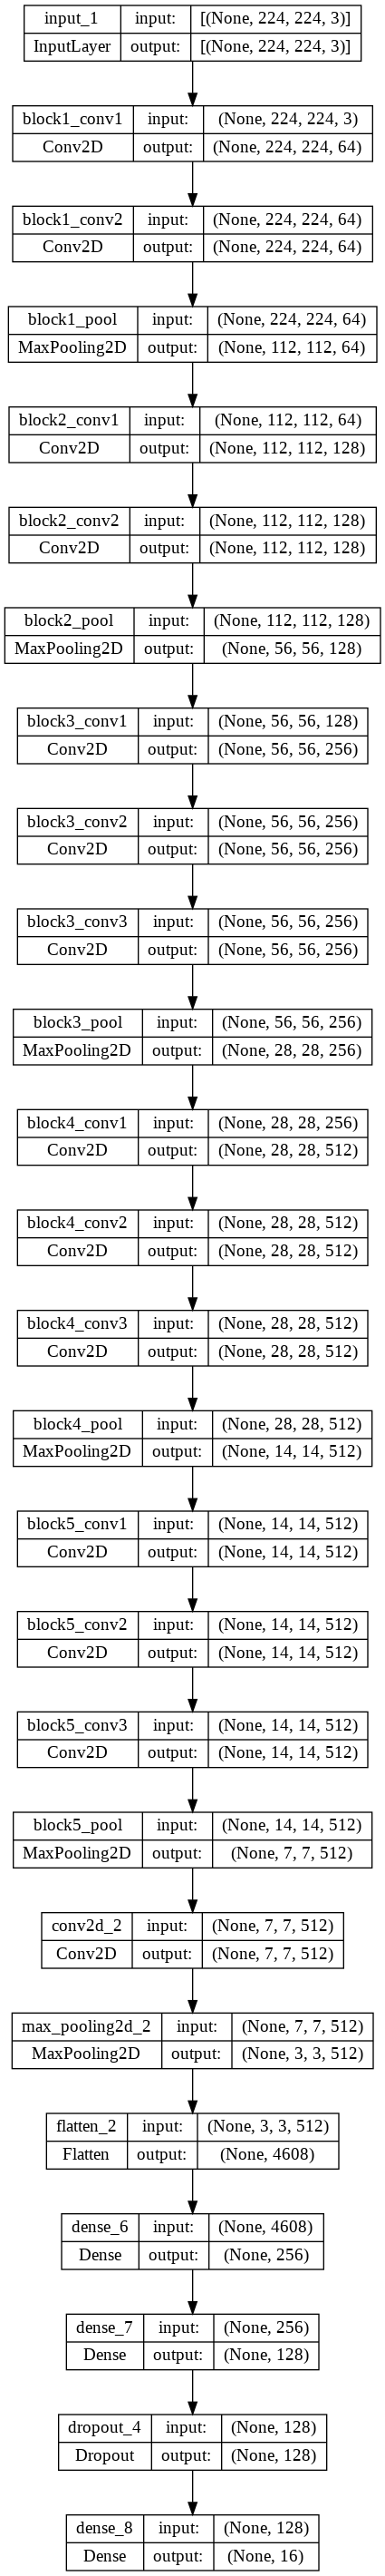

In [ ]:
tf.keras.utils.plot_model(Model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
!rm -rf ./logs/  #clear logs


1. because of pretrained model, no of trainable parameters have come down from 18M to 3.5M
2. with only 6 epochs we achieved 74 accuracy. This means weights of imagenet dataset are very useful and pretrained models are actually learning fundamental things about images.
3. after final epoch, train accuracy and test accuracy has minimal differense. So, we are not overfitting

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers.
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096.
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model.
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network.
</pre>

In [ ]:
for layer in Model.layers:
  layer.trainable = False
first_output= Model.output
first_output= Conv2D(filters=192,kernel_size=7 ,strides=1,activation="relu")(first_output)  ###kernel==7 because output from Model is of size 7,7
first_output= Conv2D(filters=96,kernel_size=1 ,strides=1,activation="relu")(first_output)  ###output from last layer is 1,1 so kernel=1
##here we take conv2d instead of dense because we have less trainabl param also we can track every pixel detail which we cannot in dense.
first_output = Flatten()(first_output)
first_output = Dropout(0.2) (first_output)
final_output= Dense(16,activation="softmax")(first_output)

In [ ]:
Model_2 = tf.keras.Model(inputs= Model.input, outputs =final_output)
Model_2.compile(loss="categorical_crossentropy",optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
Model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
Model_2.fit_generator(train_generator,epochs=6,validation_data=test_generator,callbacks=[callbacks])

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


2250/2250 [==============================] - 303s 135ms/step - loss: 1.4370 - accuracy: 0.5594 - val_loss: 1.1550 - val_accuracy: 0.6544
Epoch 2/6
2250/2250 [==============================] - 287s 128ms/step - loss: 1.0728 - accuracy: 0.6753 - val_loss: 1.0330 - val_accuracy: 0.6956
Epoch 3/6
2250/2250 [==============================] - 288s 128ms/step - loss: 0.9384 - accuracy: 0.7154 - val_loss: 1.0952 - val_accuracy: 0.6792
Epoch 4/6
2250/2250 [==============================] - 300s 133ms/step - loss: 0.8412 - accuracy: 0.7424 - val_loss: 0.9886 - val_accuracy: 0.7113
Epoch 5/6
2250/2250 [==============================] - 351s 156ms/step - loss: 0.7671 - accuracy: 0.7658 - val_loss: 1.0546 - val_accuracy: 0.7122
Epoch 6/6
2250/2250 [==============================] - 388s 172ms/step - loss: 0.7058 - accuracy: 0.7845 - val_loss: 1.0243 - val_accuracy: 0.7117


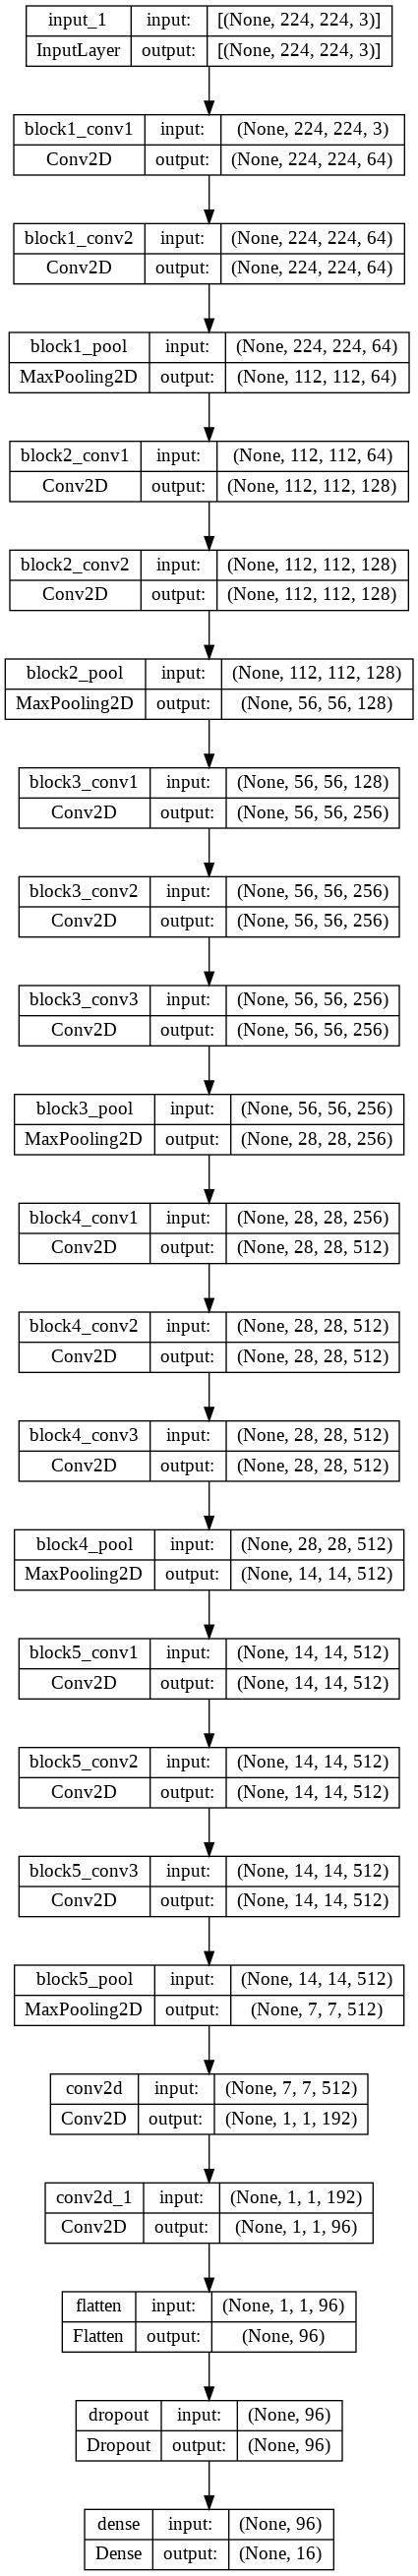

In [ ]:
tf.keras.utils.plot_model(Model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
%tensorboard --logdir logs

In [ ]:
!rm -rf ./logs/  #clear logs

1. we used Conv2D instead of dense here to have less params.
2. conv2d can also be used as dense layer because dense layer doesnt give explaination about which neuron belongs to which pixel. So it is hard to interpret.
3. Model is not overfititng

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [ ]:
for layer in Model.layers[-6:]:
  layer.trainable=True
first_output =Model.output
first_output =Conv2D(filters=256,kernel_size=7 ,strides=1,activation="relu")(first_output)
first_output =Conv2D(filters=128,kernel_size=1 ,strides=1,activation="relu")(first_output)
first_output =Flatten()(first_output)
first_output= Dropout(0.2)(first_output)
final_output =Dense(16, activation="softmax")(first_output)
Model_3 =tf.keras.Model(inputs =Model.input, outputs=final_output)
Model_3.compile(loss="categorical_crossentropy",optimizer = 'Adam',metrics=['accuracy'])


In [ ]:
Model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
Model_3.fit_generator(train_generator,epochs=6,validation_data=test_generator,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/6
2250/2250 [==============================] - 589s 256ms/step - loss: 2.7760 - accuracy: 0.0597 - val_loss: 2.7729 - val_accuracy: 0.0634
Epoch 2/6
2250/2250 [==============================] - 577s 256ms/step - loss: 2.7729 - accuracy: 0.0625 - val_loss: 2.7731 - val_accuracy: 0.0584
Epoch 3/6
2250/2250 [==============================] - 584s 260ms/step - loss: 2.7729 - accuracy: 0.0605 - val_loss: 2.7728 - val_accuracy: 0.0593
Epoch 4/6
2250/2250 [==============================] - 584s 260ms/step - loss: 2.7729 - accuracy: 0.0626 - val_loss: 2.7730 - val_accuracy: 0.0616
Epoch 5/6
2250/2250 [==============================] - 587s 261ms/step - loss: 2.7729 - accuracy: 0.0626 - val_loss: 2.7730 - val_accuracy: 0.0613
Epoch 6/6
2250/2250 [==============================] - 582s 259ms/step - loss: 2.7729 - accuracy: 0.0613 - val_loss: 2.7730 - val_accuracy: 0.0613


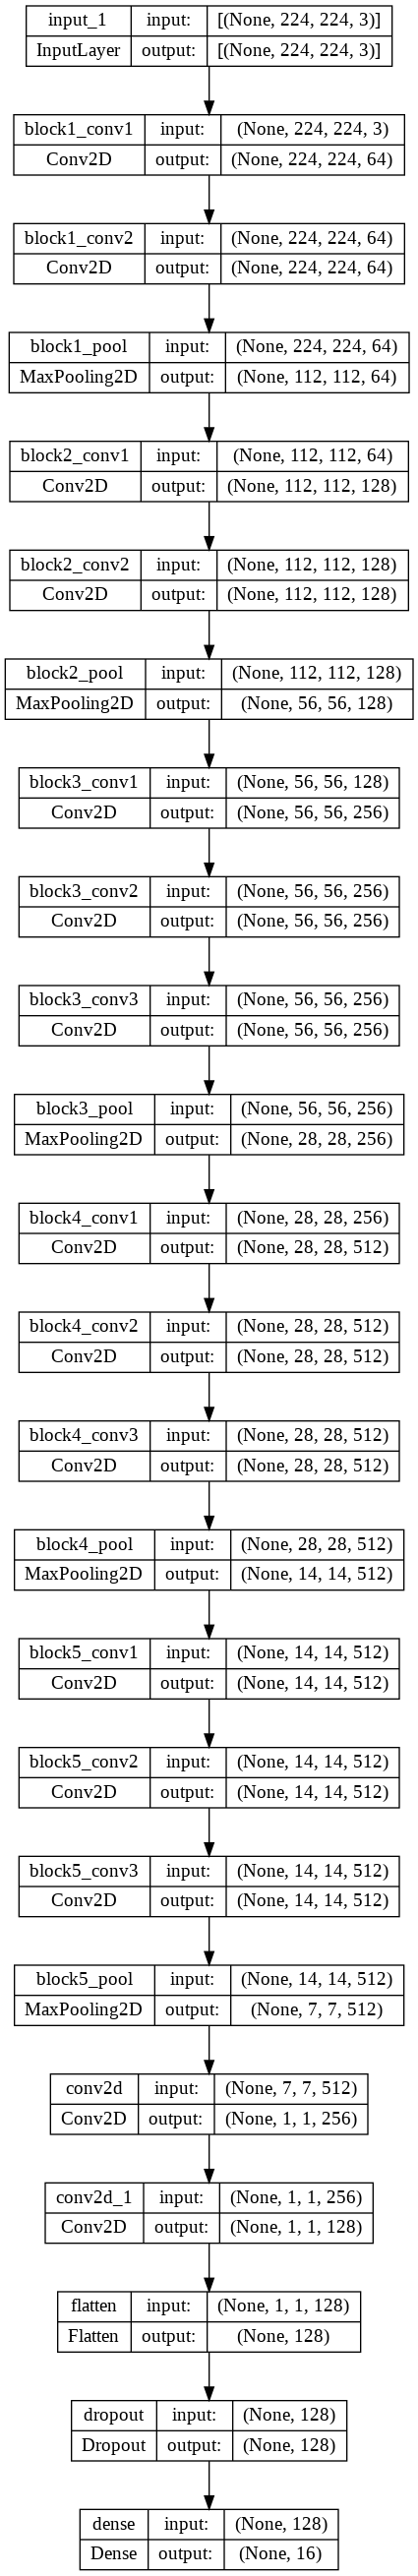

In [ ]:
tf.keras.utils.plot_model(Model_3, to_file='model_3.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
%tensorboard --logdir logs

In [ ]:
!rm -rf ./logs/  #clear logs

1. we only tain last 6 layers of VGG and the additional network
2. we have large no ofparams to train here and only 6 epochs are used. So, this model is very bad performing.
3. Looks like pretrained model with the weights initialised as the weights before last 6 layers, doesnt help the model.
4.Either use the whole vgg completely or train it from scratch. Because original vgg16 might have got trained using large no of epochs and with 6 epochs we dont train it good enough.